In [246]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [248]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Finding Null Values in the Dataset

In [251]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Finding if is there any imbalance in the dataset

In [253]:
df['Attrition'].value_counts() # the data is imbalanced

Attrition
No     1233
Yes     237
Name: count, dtype: int64

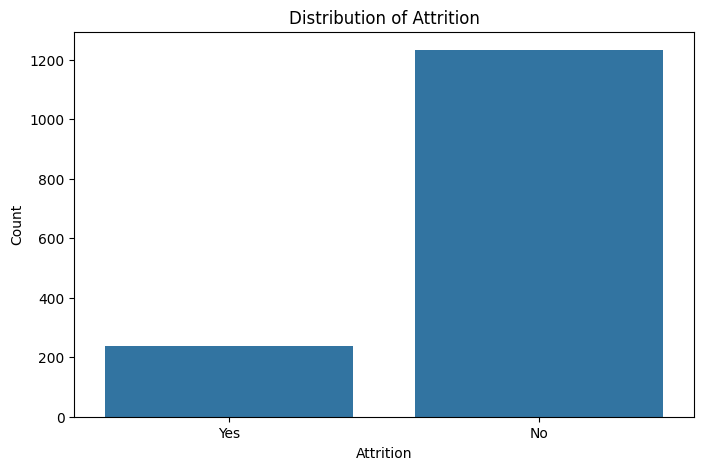

In [254]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [255]:
pd.set_option('display.max_columns',None) # for displaying all the columns in data 

In [256]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Selecting numerical columns

In [258]:
df_num = df.select_dtypes(include=['number'])

In [259]:
df_num

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,4,2571,12290,4,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,2,6142,5174,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,2,5390,13243,2,14,3,4,80,0,17,3,2,9,6,0,8


#### Finding the distribution of numerical columns

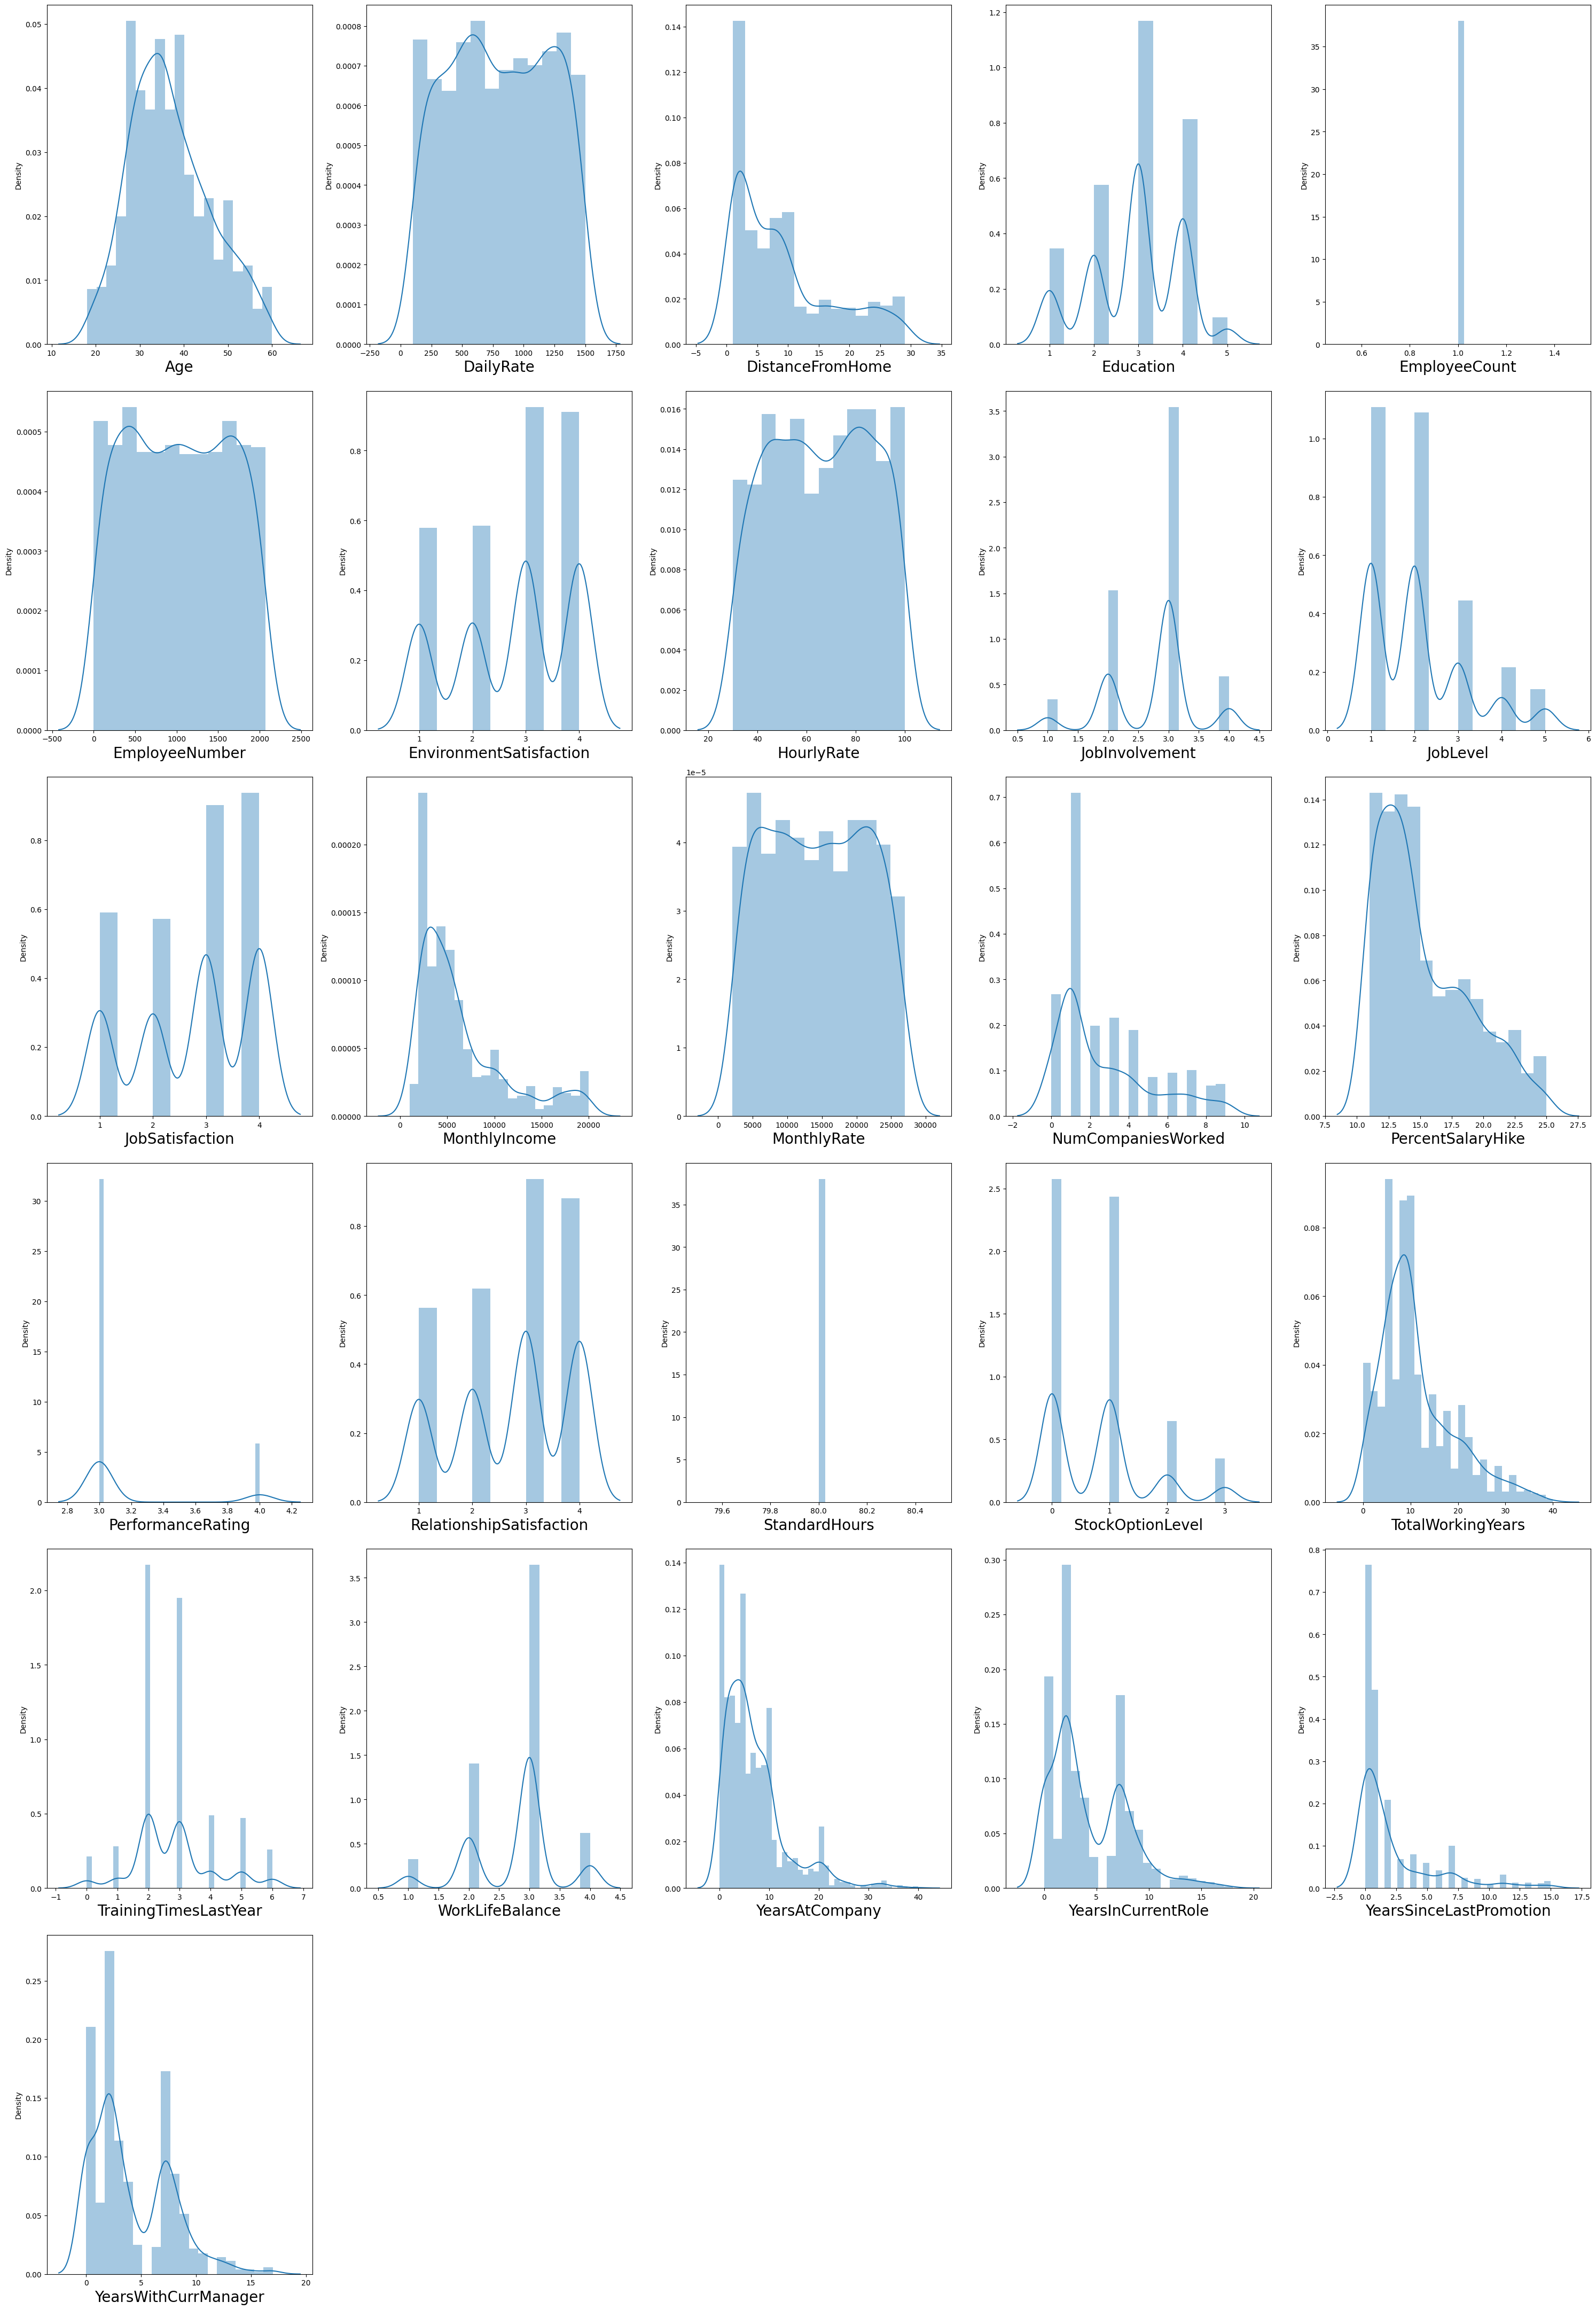

In [261]:
plt.figure(figsize=(30,50))
plot = 1

for column in df_num:
    if plot <= 35:
        ax = plt.subplot(7,5,plot)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=20)
    
    plot += 1

plt.tight_layout()

In [262]:
# Some data are not normaly distributed

In [263]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#### Checking the skewness of numerical columns

In [265]:
df_num.skew().sort_values(ascending=False)

YearsSinceLastPromotion     1.984290
PerformanceRating           1.921883
YearsAtCompany              1.764529
MonthlyIncome               1.369817
TotalWorkingYears           1.117172
NumCompaniesWorked          1.026471
JobLevel                    1.025401
StockOptionLevel            0.968980
DistanceFromHome            0.958118
YearsInCurrentRole          0.917363
YearsWithCurrManager        0.833451
PercentSalaryHike           0.821128
TrainingTimesLastYear       0.553124
Age                         0.413286
MonthlyRate                 0.018578
EmployeeNumber              0.016574
StandardHours               0.000000
EmployeeCount               0.000000
DailyRate                  -0.003519
HourlyRate                 -0.032311
Education                  -0.289681
RelationshipSatisfaction   -0.302828
EnvironmentSatisfaction    -0.321654
JobSatisfaction            -0.329672
JobInvolvement             -0.498419
WorkLifeBalance            -0.552480
dtype: float64

In [266]:
df.drop(['EmployeeNumber','EmployeeCount','StandardHours','Over18'], axis=1, inplace=True)

In [267]:
right_skewed_cols = [
    'YearsSinceLastPromotion',
    'PerformanceRating',
    'YearsAtCompany',
    'MonthlyIncome',
    'TotalWorkingYears',
    'NumCompaniesWorked',
    'JobLevel'
]

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[right_skewed_cols] = pt.fit_transform(df[right_skewed_cols])



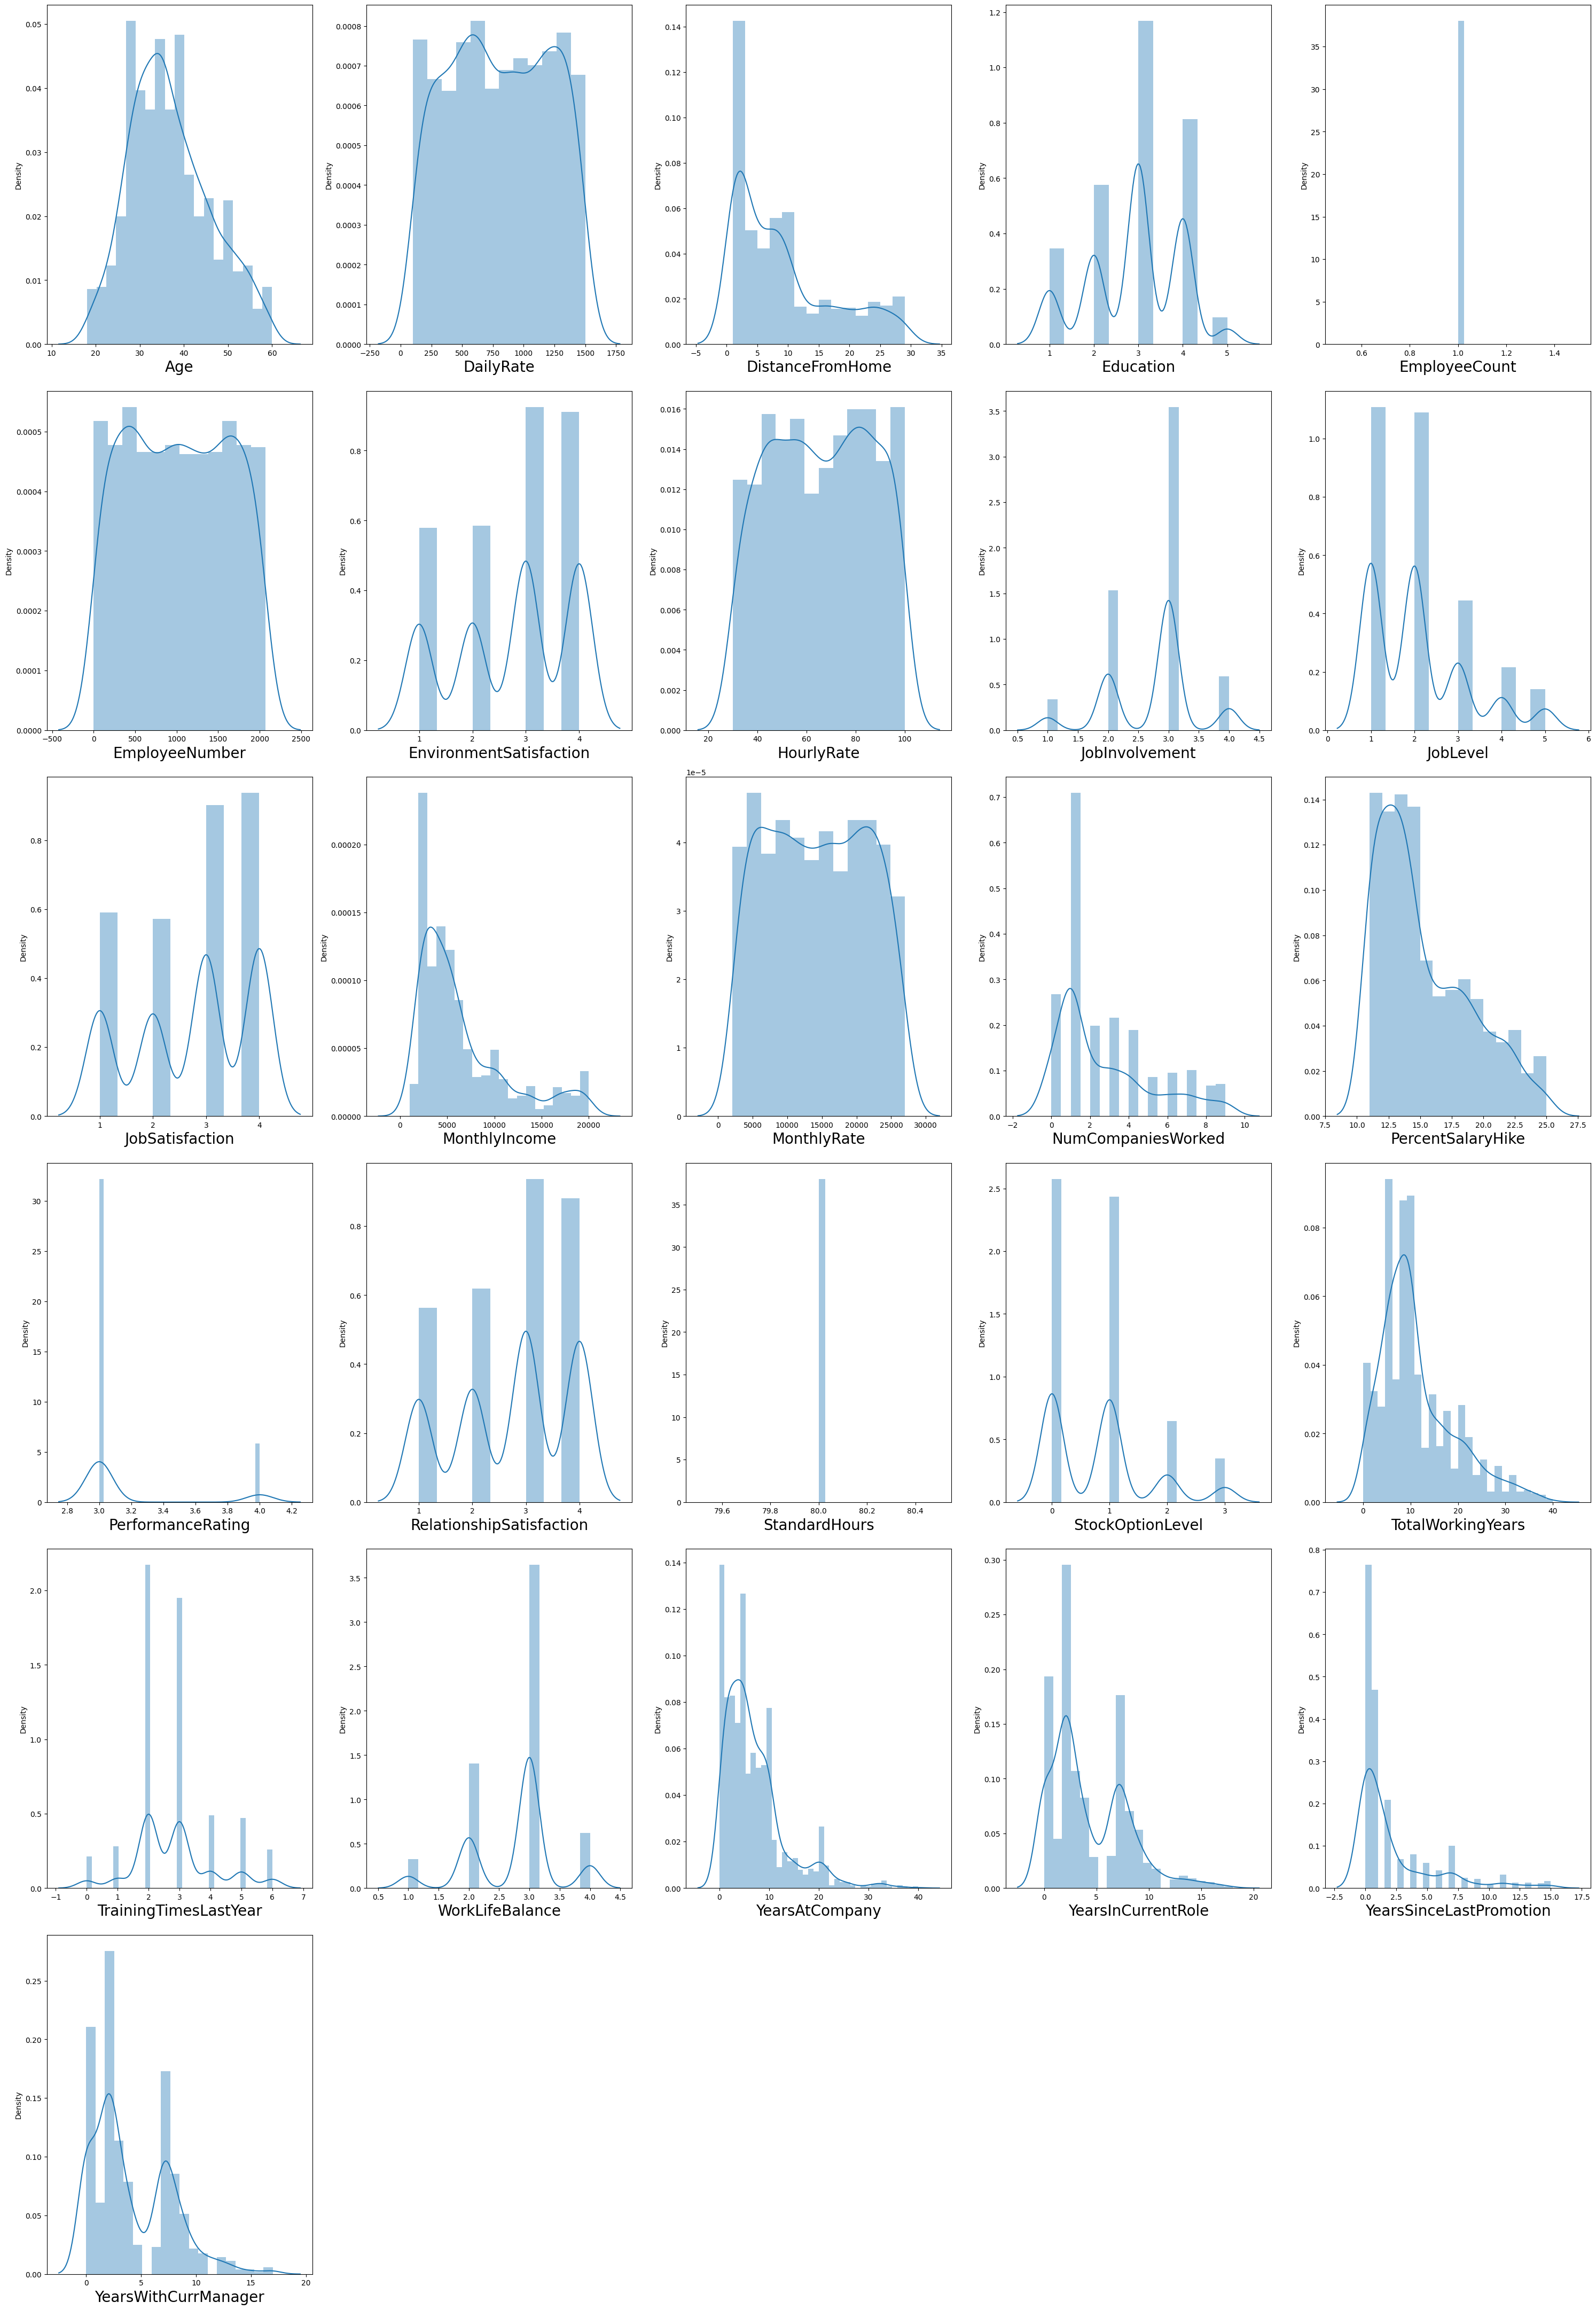

In [268]:
plt.figure(figsize=(30,50))
plot = 1

for column in df_num:
    if plot <= 35:
        ax = plt.subplot(7,5,plot)
        sns.distplot(df_num[column])
        plt.xlabel(column,fontsize=20)
    
    plot += 1

plt.tight_layout()

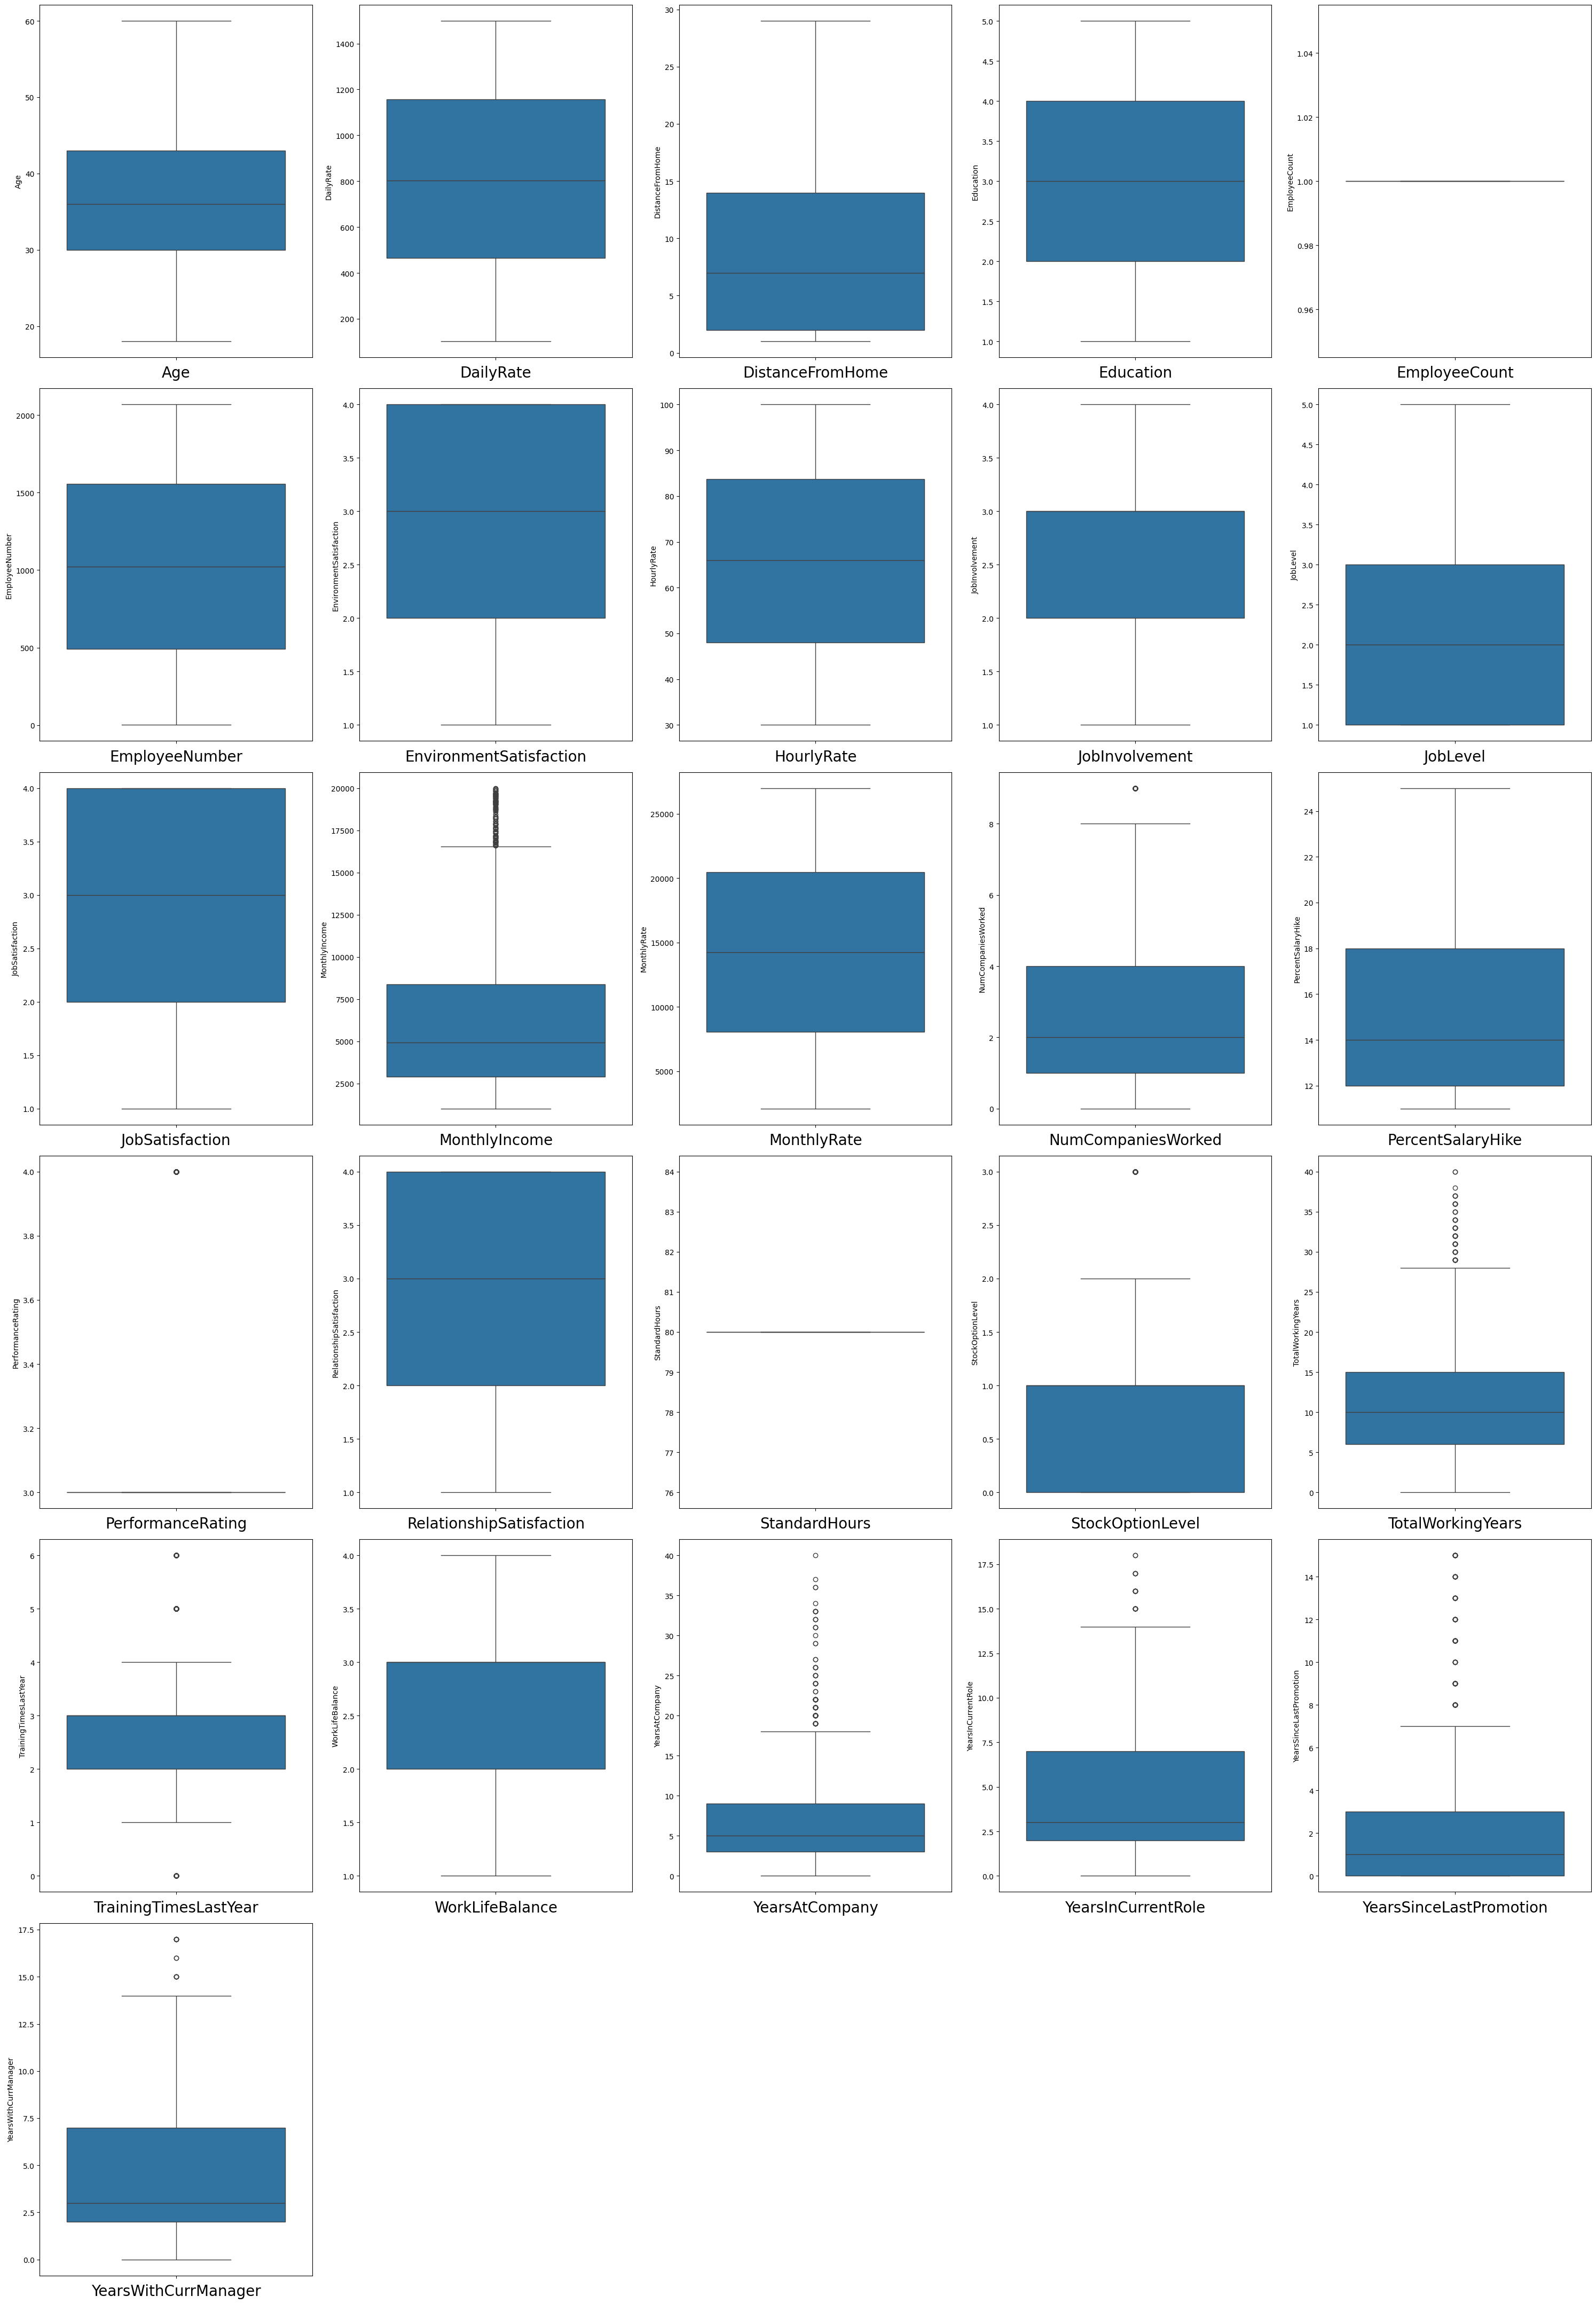

In [269]:
plt.figure(figsize=(30,50))
plot = 1

for column in df_num:
    if plot <= 35:
        ax = plt.subplot(7,5,plot)
        sns.boxplot(df_num[column])
        plt.xlabel(column,fontsize=20)
    
    plot += 1

plt.tight_layout()

### Data Cleaning and Preprocessing

In [271]:
df['Gender']= df['Gender'].map({'Male':1,'Female':0})

In [272]:
df['BusinessTravel']= df['BusinessTravel'].map({'Non-Travel':0,'Travel_Frequently':2,'Travel_Rarely':1})

In [273]:
df['MaritalStatus']= df['MaritalStatus'].map({'Single':0,'Married':1,'Divorced':2})

In [274]:
df['Department'] = df['Department'].map({'Human Resources':0,'Research & Development':1,'Sales':2})

In [275]:
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})

In [276]:
df['Attrition']= df['Attrition'].map({'Yes':1,'No':0})

In [277]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [278]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   object 
 14  JobSatis

#### encoding categorical columns

In [281]:
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int32  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

In [283]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              0.082428
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus               0.152175
MonthlyIncome               0.032831
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

## Balancing the Dataset

In [285]:
from sklearn.utils import resample


majority = df[df['Attrition'] == 0]
minority = df[df['Attrition'] == 1]


minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)


oversampled_data = pd.concat([majority, minority_oversampled])


oversampled_distribution = oversampled_data.Attrition.value_counts()

oversampled_distribution

Attrition
0    1233
1    1233
Name: count, dtype: int64

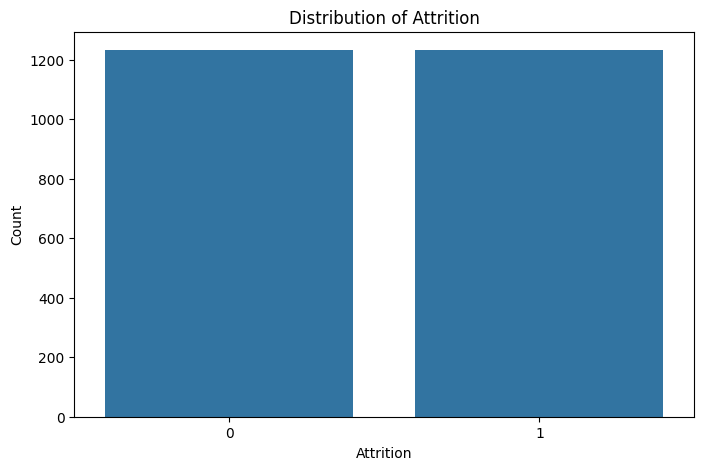

In [286]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=oversampled_data)
plt.title('Distribution of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [287]:
oversampled_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,2,279,1,8,1,1,3,1,61,2,0.241622,6,2,1,0.052833,24907,-0.571302,0,23,4.232725e-16,4,1,0.052495,3,3,0.762660,7,0.096854,7
3,33,0,2,1392,1,3,4,1,4,0,56,3,-1.170135,6,3,1,-0.863050,23159,-0.571302,1,11,-7.632783e-17,3,0,-0.244305,3,3,0.482432,7,0.905592,0
4,27,0,1,591,1,2,1,3,1,1,40,3,-1.170135,2,2,1,-0.567909,16632,1.766182,0,12,-7.632783e-17,4,1,-0.592063,3,3,-0.951540,2,0.607464,2
5,32,0,2,1005,1,2,2,1,4,1,79,3,-1.170135,2,4,0,-0.772577,11864,-1.664787,0,13,-7.632783e-17,3,0,-0.244305,2,2,0.320677,7,0.905592,6
6,59,0,1,1324,1,3,3,3,3,0,81,4,-1.170135,2,1,1,-1.010873,9964,0.792695,1,20,4.232725e-16,1,3,0.313335,3,2,-1.440442,0,-1.094862,0


In [288]:
oversampled_data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.00000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2.466000e+03,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,35.598135,0.500000,1.143958,789.486618,1.293593,9.585564,2.894161,2.248986,2.611517,0.604623,65.656123,2.636253,-0.179001,4.628954,2.63747,0.790349,-0.193019,14226.170316,0.040930,0.392133,15.195864,1.468817e-18,2.661800,0.689781,-0.205651,2.757908,2.734388,-0.177999,3.691403,-0.055666,3.610706
std,9.486336,0.500101,0.534374,403.747094,0.560150,8.275344,1.006949,1.372746,1.143610,0.489031,20.283012,0.753819,1.006441,2.518048,1.12105,0.733607,1.035360,7145.083034,1.007060,0.488325,3.703099,1.811856e-16,1.091725,0.875097,1.073231,1.243314,0.740874,1.058670,3.532415,1.004466,3.474058
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,-1.170135,0.000000,1.00000,0.000000,-2.882064,2094.000000,-1.664787,0.000000,11.000000,-7.632783e-17,1.000000,0.000000,-2.565715,0.000000,1.000000,-2.229592,0.000000,-1.094862,0.000000
25%,29.000000,0.000000,1.000000,441.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,-1.170135,2.000000,2.00000,0.000000,-1.050496,8269.000000,-0.571302,0.000000,12.000000,-7.632783e-17,2.000000,0.000000,-0.792958,2.000000,2.000000,-0.951540,1.000000,-1.094862,0.000000
50%,34.000000,0.500000,1.000000,769.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,65.000000,3.000000,0.241622,6.000000,3.00000,1.000000,-0.191289,14180.000000,0.043423,0.000000,14.000000,-7.632783e-17,3.000000,0.000000,-0.244305,3.000000,3.000000,-0.066114,2.000000,0.096854,2.000000
75%,42.000000,1.000000,1.000000,1141.000000,2.000000,15.000000,4.000000,3.000000,4.000000,1.000000,84.000000,3.000000,0.241622,7.000000,4.00000,1.000000,0.574067,20470.000000,0.792695,1.000000,18.000000,-7.632783e-17,4.000000,1.000000,0.433228,3.000000,3.000000,0.628829,7.000000,0.607464,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,1.843456,8.000000,4.00000,2.000000,1.863261,26999.000000,1.766182,1.000000,25.000000,4.232725e-16,4.000000,3.000000,2.501157,6.000000,4.000000,2.753392,18.000000,1.826888,17.000000


In [289]:
x = oversampled_data.drop(columns='Attrition')
y = oversampled_data.Attrition

#### Finding the best features using feature selection

In [291]:
from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func=f_classif, k=14)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)
df_pvalues = pd.DataFrame(fit.pvalues_)
df_columns = pd.DataFrame(x.columns)

# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores,df_pvalues],axis=1)

feature_scores.columns = ['Feature_Name','Score','P_values']  # name output columns

print(feature_scores.nlargest(14,'Score'))  # print 14 top best features


               Feature_Name       Score      P_values
18                 OverTime  287.206515  5.058447e-61
23        TotalWorkingYears  208.692377  1.811137e-45
15            MonthlyIncome  199.287815  1.422782e-43
11                 JobLevel  183.264685  2.503745e-40
26           YearsAtCompany  161.865693  5.835917e-36
27       YearsInCurrentRole  130.748083  1.540665e-29
14            MaritalStatus  130.063114  2.138147e-29
29     YearsWithCurrManager  122.771409  7.044775e-28
0                       Age  110.285889  2.874042e-25
10           JobInvolvement   80.714386  5.061084e-19
22         StockOptionLevel   80.171863  6.602529e-19
1            BusinessTravel   67.412256  3.511183e-16
7   EnvironmentSatisfaction   49.071772  3.171387e-12
13          JobSatisfaction   39.689794  3.514432e-10


In [292]:
X = oversampled_data[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','BusinessTravel','JobSatisfaction','EnvironmentSatisfaction']]
X

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,BusinessTravel,JobSatisfaction,EnvironmentSatisfaction
1,0,0.052495,0.241622,1,7,0.052833,49,7,1,0.762660,2,2,2,3
3,1,-0.244305,-1.170135,1,7,-0.863050,33,0,0,0.482432,3,2,3,4
4,0,-0.592063,-1.170135,1,2,-0.567909,27,2,1,-0.951540,3,1,2,1
5,0,-0.244305,-1.170135,0,7,-0.772577,32,6,0,0.320677,3,2,4,4
6,1,0.313335,-1.170135,1,0,-1.010873,59,0,3,-1.440442,4,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,1.618571,1.843456,0,10,1.792895,45,11,0,1.972508,1,1,2,1
366,0,-0.244305,0.241622,0,7,0.914288,41,7,0,0.482432,3,2,2,1
801,1,-0.792958,0.241622,0,0,-0.072501,50,0,0,-2.229592,3,2,3,4
791,1,-0.090665,1.009822,0,7,0.946529,35,7,0,0.482432,3,1,1,4


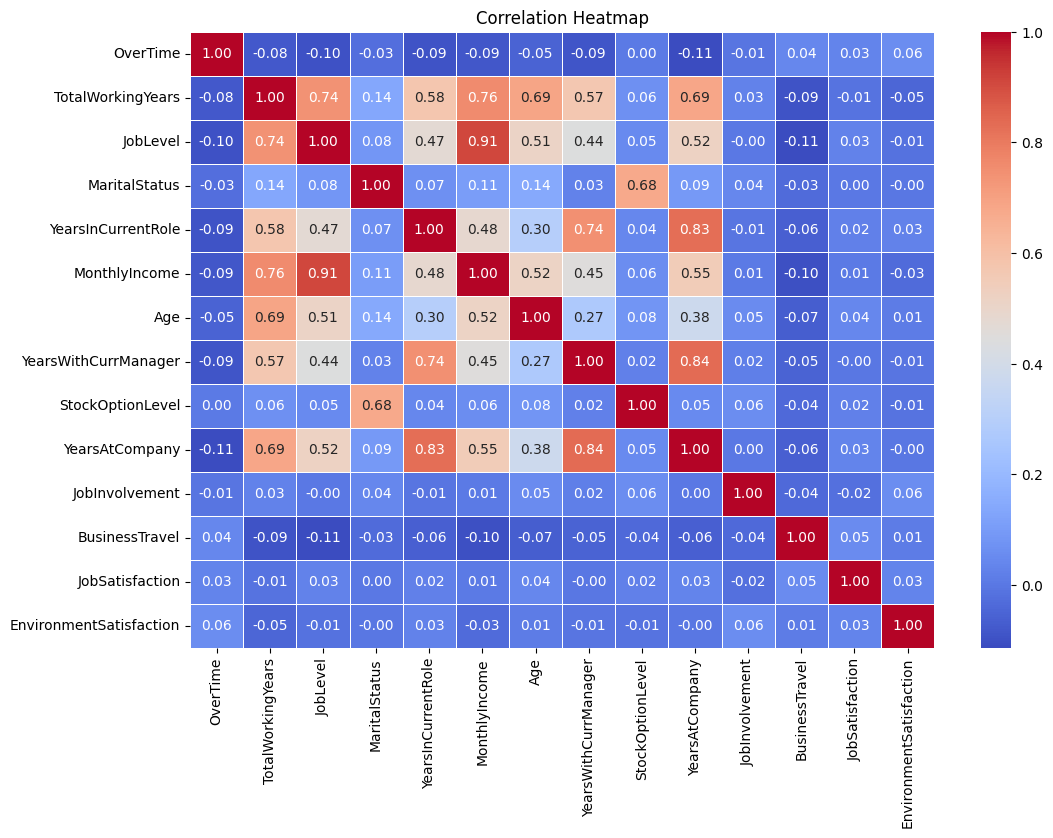

In [293]:
plt.figure(figsize=(12, 8))

corr = X.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title("Correlation Heatmap")
plt.show()


In [294]:
# multicolinearity is there

cols_to_drop = [
    'YearsInCurrentRole',
    'YearsWithCurrManager',
    'MonthlyIncome',
    'YearsAtCompany'
]

X.drop(columns=cols_to_drop, inplace=True)

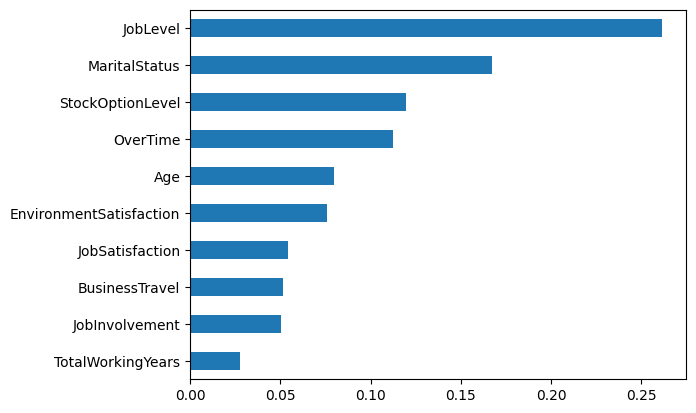

In [295]:

importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind='barh')
plt.show()


In [296]:
X.shape

(2466, 10)

In [297]:
# Rescaling numerical features
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X.index)

X.head()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,Age,StockOptionLevel,JobInvolvement,BusinessTravel,JobSatisfaction,EnvironmentSatisfaction
1,-0.803179,0.240580,0.418016,0.285840,1.413041,0.354569,-0.844211,1.602278,-0.568751,0.339768
3,1.245052,-0.036024,-0.984991,0.285840,-0.273937,-0.788394,0.482637,1.602278,0.323450,1.214370
4,-0.803179,-0.360118,-0.984991,0.285840,-0.906554,0.354569,0.482637,-0.269450,-0.568751,-1.409435
5,-0.803179,-0.036024,-0.984991,-1.077565,-0.379373,-0.788394,0.482637,1.602278,1.215652,1.214370
6,1.245052,0.483671,-0.984991,0.285840,2.467403,2.640494,1.809484,-0.269450,-1.460953,0.339768


In [298]:
# Buidling model to test unexposed data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1849, 10) (1849,)
(617, 10) (617,)


In [299]:
results = []


# Implimentation of Models

1. K-Nearest Neighbors (KNN)

In [302]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred_knn = model.predict(x_test)

print(classification_report(y_test,y_pred_knn))
print('Accuracy: ',accuracy_score(y_test,y_pred_knn))


results.append(['KNeighborsClassifier', accuracy_score(y_test, y_pred_knn),model.score(x_train,y_train),model.score(x_test,y_test)])

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       311
           1       0.76      0.92      0.83       306

    accuracy                           0.82       617
   macro avg       0.83      0.82      0.82       617
weighted avg       0.83      0.82      0.82       617

Accuracy:  0.8168557536466775


In [303]:
print('Trainig Score: ',model.score(x_train,y_train))
print('Test Score: ',model.score(x_test,y_test))

Trainig Score:  0.8880475932936722
Test Score:  0.8168557536466775


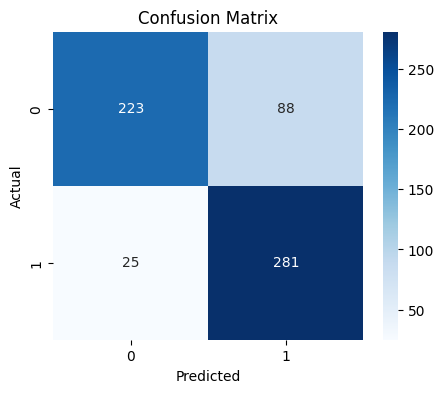

In [304]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


2. Decision Tree Classifier

In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dct = DecisionTreeClassifier()
dct.fit(x_train, y_train)

y_pred_dct = dct.predict(x_test)


print(classification_report(y_test,y_pred_dct))
print('Accuracy: ',accuracy_score(y_test,y_pred_dct))

results.append(['DecisionTreeClassifier', accuracy_score(y_test, y_pred_dct),dct.score(x_train,y_train),dct.score(x_test,y_test)])

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       311
           1       0.83      0.98      0.90       306

    accuracy                           0.89       617
   macro avg       0.90      0.89      0.89       617
weighted avg       0.90      0.89      0.89       617

Accuracy:  0.8865478119935171


In [307]:
print('Trainig Score: ',dct.score(x_train,y_train))
print('Test Score: ',dct.score(x_test,y_test))


Trainig Score:  1.0
Test Score:  0.8865478119935171


In [308]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_dt.fit(x_train, y_train)

print("Best Parameters:", grid_dt.best_params_)


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [309]:
best_dt = grid_dt.best_estimator_

y_pred = best_dt.predict(x_test)
y_prob = best_dt.predict_proba(x_test)[:, 1]

print("Final Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

results.append(['DecisionTreeClassifier(Tuning)', accuracy_score(y_test, y_pred),best_dt.score(x_train,y_train),best_dt.score(x_test,y_test)])

Final Accuracy: 0.8525121555915721
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       311
           1       0.82      0.91      0.86       306

    accuracy                           0.85       617
   macro avg       0.86      0.85      0.85       617
weighted avg       0.86      0.85      0.85       617



In [310]:
print('Trainig Score: ',best_dt.score(x_train,y_train))
print('Test Score: ',best_dt.score(x_test,y_test))


Trainig Score:  0.9502433747971877
Test Score:  0.8525121555915721


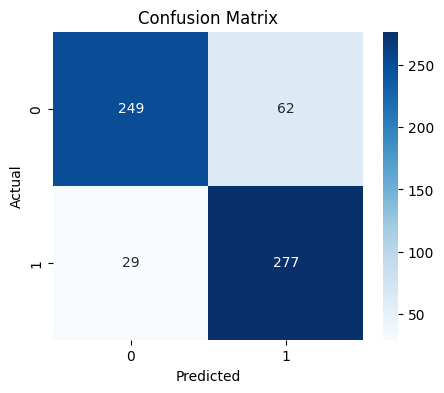

In [311]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


3. Logistic Regression

In [313]:
from sklearn.linear_model  import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(x_train,y_train)

y_pred_log = log_reg.predict(x_test)

print(classification_report(y_test, y_pred_log))
print('Accuracy: ',accuracy_score(y_test,y_pred_log))

results.append(['LogisticRegression', accuracy_score(y_test, y_pred_log),log_reg.score(x_train,y_train),log_reg.score(x_test,y_test)])

              precision    recall  f1-score   support

           0       0.75      0.74      0.75       311
           1       0.74      0.75      0.75       306

    accuracy                           0.75       617
   macro avg       0.75      0.75      0.75       617
weighted avg       0.75      0.75      0.75       617

Accuracy:  0.747163695299838


In [314]:
print('Trainig Score: ',log_reg.score(x_train,y_train))
print('Test Score: ',log_reg.score(x_test,y_test))


Trainig Score:  0.756625202812331
Test Score:  0.747163695299838


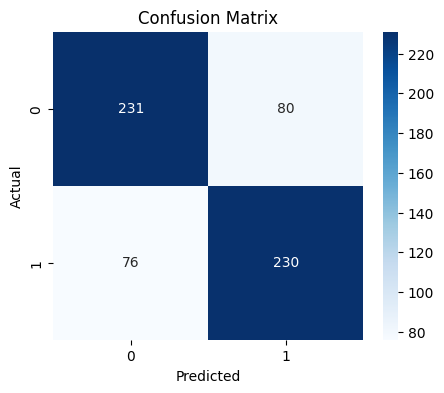

In [315]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


4. Random Forest Classifier

In [317]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_ = RandomForestClassifier()
random_.fit(x_train, y_train)

y_pred_rnd = random_.predict(x_test)


print(classification_report(y_test,y_pred_rnd))
print('Accuracy: ',accuracy_score(y_test,y_pred_rnd))

results.append(['RandomForestClassifier', accuracy_score(y_test, y_pred_rnd),random_.score(x_train,y_train),random_.score(x_test,y_test)])


              precision    recall  f1-score   support

           0       0.98      0.90      0.93       311
           1       0.90      0.98      0.94       306

    accuracy                           0.94       617
   macro avg       0.94      0.94      0.94       617
weighted avg       0.94      0.94      0.94       617

Accuracy:  0.9367909238249594


In [318]:
print('Trainig Score: ',random_.score(x_train,y_train))
print('Test Score: ',random_.score(x_test,y_test))


Trainig Score:  1.0
Test Score:  0.9367909238249594


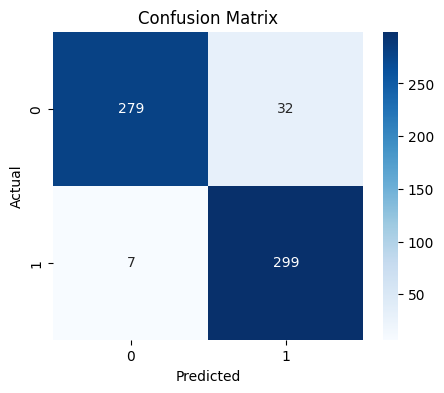

In [319]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rnd)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


5. Gradient Boosting Classifier

In [321]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=8,
    random_state=42
)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
y_prob = gb.predict_proba(x_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

results.append(['GradientBoostingClassifier', accuracy_score(y_test, y_pred_gb),gb.score(x_train,y_train),gb.score(x_test,y_test)])


ROC-AUC: 0.943057394447597
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       311
           1       0.85      0.93      0.89       306

    accuracy                           0.88       617
   macro avg       0.89      0.89      0.88       617
weighted avg       0.89      0.88      0.88       617

Accuracy: 0.8849270664505673


In [322]:
print('Trainig Score: ',gb.score(x_train,y_train))
print('Test Score: ',gb.score(x_test,y_test))


Trainig Score:  0.9724175229853975
Test Score:  0.8849270664505673


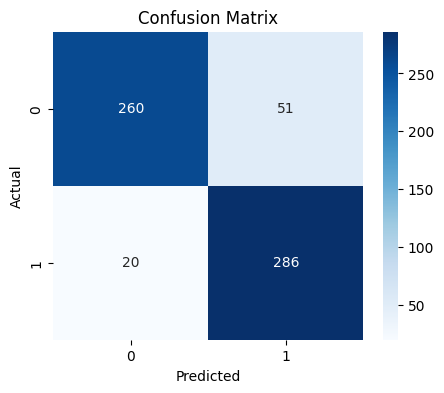

In [323]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


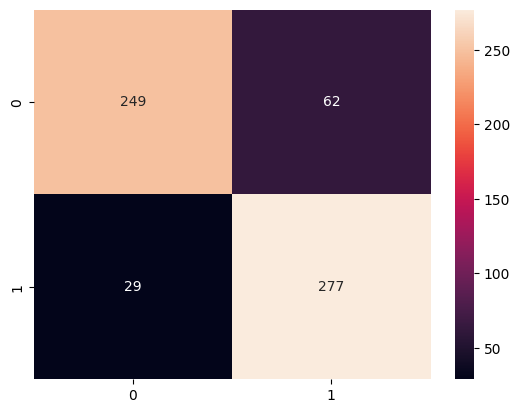

In [324]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


#### Ploting the ROC-AUC Curve for all the models

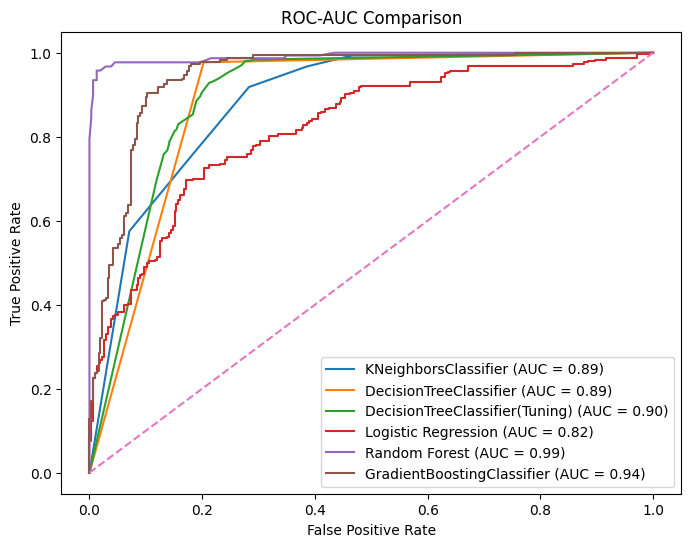

In [326]:
models = {
    "KNeighborsClassifier" : model,
    "DecisionTreeClassifier": dct,
    "DecisionTreeClassifier(Tuning)": best_dt,
    "Logistic Regression": log_reg,
    "Random Forest": random_,
    "GradientBoostingClassifier": gb
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    probs = model.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Comparison")
plt.legend()
plt.show()


#### Comparison of Models

In [328]:
results

[['KNeighborsClassifier',
  0.8168557536466775,
  0.8880475932936722,
  0.8168557536466775],
 ['DecisionTreeClassifier', 0.8865478119935171, 1.0, 0.8865478119935171],
 ['DecisionTreeClassifier(Tuning)',
  0.8525121555915721,
  0.9502433747971877,
  0.8525121555915721],
 ['LogisticRegression',
  0.747163695299838,
  0.756625202812331,
  0.747163695299838],
 ['RandomForestClassifier', 0.9367909238249594, 1.0, 0.9367909238249594],
 ['GradientBoostingClassifier',
  0.8849270664505673,
  0.9724175229853975,
  0.8849270664505673]]

In [329]:
accuracy_df = pd.DataFrame(
    results,
    columns=['Model', 'Accuracy','Train_Score','Test_Score']
)

accuracy_df.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Train_Score,Test_Score
4,RandomForestClassifier,0.936791,1.000000,0.936791
1,DecisionTreeClassifier,0.886548,1.000000,0.886548
5,GradientBoostingClassifier,0.884927,0.972418,0.884927
2,DecisionTreeClassifier(Tuning),0.852512,0.950243,0.852512
0,KNeighborsClassifier,0.816856,0.888048,0.816856
3,LogisticRegression,0.747164,0.756625,0.747164


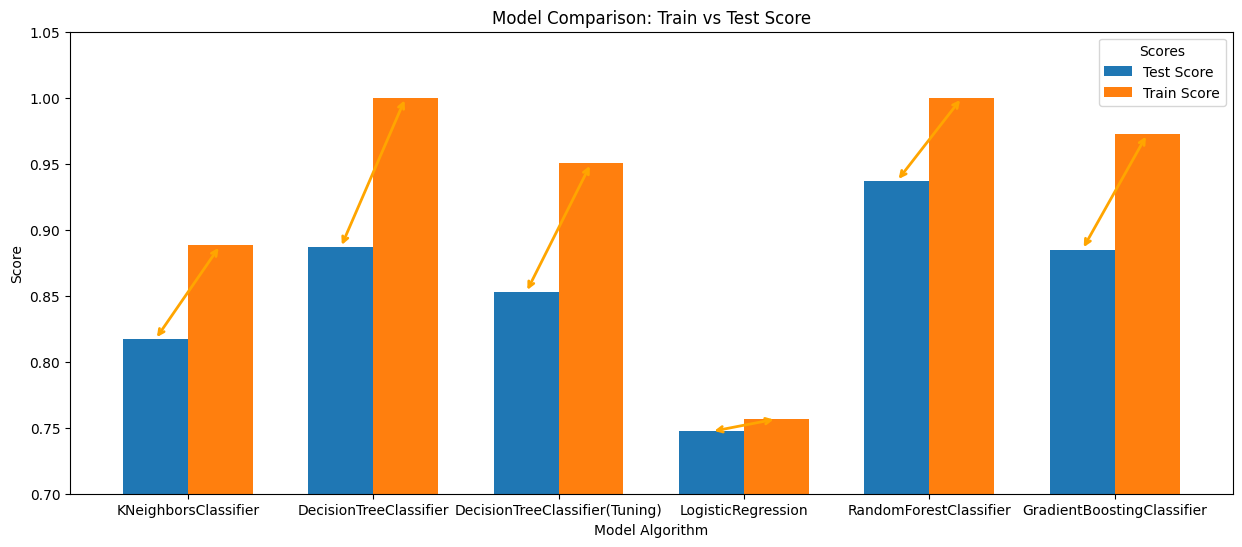

In [330]:
import matplotlib.pyplot as plt
import numpy as np

# Extract values
models = accuracy_df['Model']
train_scores = accuracy_df['Train_Score']
test_scores = accuracy_df['Test_Score']

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(15, 6))

# Bars
plt.bar(x - width/2, test_scores, width, label='Test Score')
plt.bar(x + width/2, train_scores, width, label='Train Score')

# Arrows (generalization gap)
for i in range(len(models)):
    plt.annotate(
        '',
        xy=(x[i] + width/2, train_scores[i]),
        xytext=(x[i] - width/2, test_scores[i]),
        arrowprops=dict(arrowstyle='<->', lw=2, color='orange')
    )

# Labels & title
plt.xlabel('Model Algorithm')
plt.ylabel('Score')
plt.title('Model Comparison: Train vs Test Score')
plt.xticks(x, models)
plt.ylim(0.7, 1.05)
plt.legend(title='Scores')

plt.show()
